In [1]:
import numpy as np 
from scipy.special import softmax 
import time 

from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import seaborn as sns 

import sys 
sys.path.append("..") 
from utils.gridworld import frozen_lake
from utils.viz import viz 
viz.get_style()

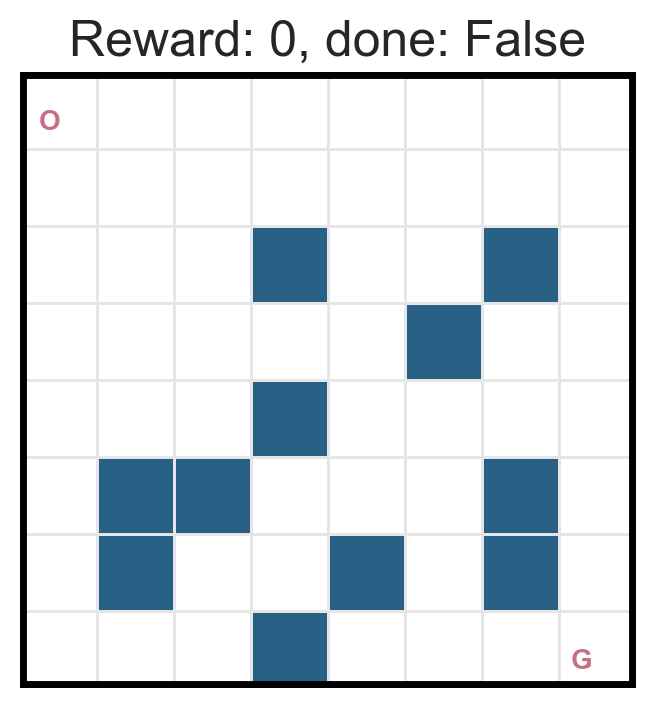

In [4]:
# The frozen lake 
layout = [
    "S.......",
    "........",
    "...H..H.",
    ".....H..",
    "...H....",
    ".HH...H.",
    ".H..H.H.",
    "...H...G"
]
env = frozen_lake(layout, eps=.2)
env.reset()
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
env.render(ax)

## Dynmamic programming

In [7]:
def value_iter(env, seed=1234, theta=1e-4, gamma=.99, show_update=False):
    
    rng = np.random.RandomState(seed)
    # initialize V(s), arbitrarily except V(terminal)=0
    V = rng.rand(env.nS) * 0.001
    # except v(terminal) = 0
    for s in env.s_termination:
        V[s] = 0
    # init policy 
    pi = np.zeros([env.nS, env.nA])
    # loop until converge
    while True:
        delta = 0
        for s in env.S:
            v_old = V[s].copy()
            q = np.zeros([env.nA])
            for a in env.A:
                p = env.p_s_next(s, a)
                for s_next in env.S:
                    r, done = env.r(s_next)
                    q[a] += p[s_next]*(r + (1-done)*gamma*V[s_next])
            V[s] = np.max(q)
            pi[s] = np.eye(env.nA)[np.argmax(q)]
            delta = np.max([delta, np.abs(V[s] - v_old)])

        # visualize 
        if show_update:
            _, axs = plt.subplots(1, 2, figsize=(8, 4))
            clear_output(True)
            ax = axs[0]
            env.show_v(ax, V)
            ax = axs[1]
            env.show_pi(ax, pi)
            time.sleep(.5)
            plt.show()

        # check convergence
        if delta < theta: break 

    for s in env.s_termination:
        V[s] = 0
    return V, pi 
        

In [9]:
seed = 1234 
env = frozen_lake(seed=seed, eps=.2)
env.reset()
V2, pi2 = value_iter(env)
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
ax = axs[0]
env.show_v(ax, V2)
ax = axs[1]
env.show_pi(ax, pi2)